In [1]:
import numpy as np
import cv2

faceCascade = cv2.CascadeClassifier("Cascades/haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(0)
cap.set(3,640) # set Width
cap.set(4,480) # set Height
while True:
    ret, img = cap.read()
    #img = cv2.flip(img, -1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.2,
        minNeighbors=5,     
        minSize=(20, 20)
    )
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]  
    cv2.imshow('video',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.2,
        minNeighbors=5,     
        minSize=(20, 20)
        )

In [3]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

In [4]:
mkdir dataset

A subdirectory or file dataset already exists.


In [5]:
import cv2
import os

cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height
face_detector = cv2.CascadeClassifier("Cascades/haarcascade_frontalface_default.xml")
# For each person, enter one numeric face id
face_id = input('\n enter user id end press <return> ==>  ')
print("\n [INFO] Initializing face capture. Look the camera and wait ...")
# Initialize individual sampling face count
count = 0
while(True):
    ret, img = cam.read()
    #img = cv2.flip(img, -1) # flip video image vertically
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        # Save the captured image into the datasets folder
        cv2.imwrite("dataset/User." + str(face_id) + '.' +  
                    str(count) + ".jpg", gray[y:y+h,x:x+w])
        cv2.imshow('image', img)
    k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 20: # Take 30 face sample and stop video
         break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()


 enter user id end press <return> ==>  8

 [INFO] Initializing face capture. Look the camera and wait ...

 [INFO] Exiting Program and cleanup stuff


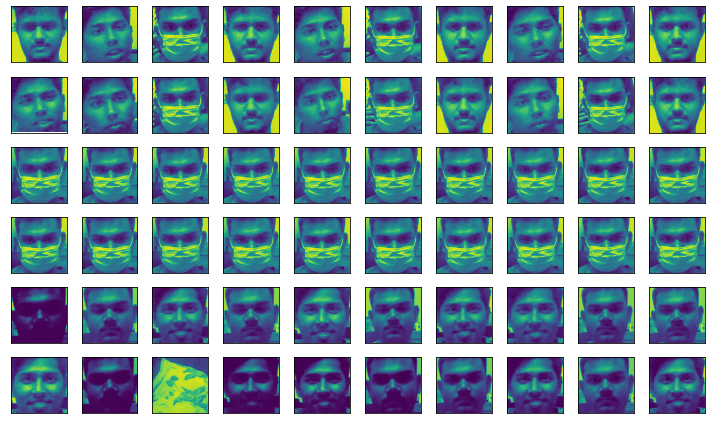

In [6]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


images = []
for img_path in glob.glob('dataset/*.jpg'):
    images.append(mpimg.imread(img_path))

    
ROWS = 6
COLS = 10
i = 0
plt.figure(figsize=(10,6))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(images[i])
        
        plt.xticks([])
        plt.yticks([])
        
        i += 1
plt.tight_layout()
plt.show() 